In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from symbol import Symbol
from index import Index
import seaborn as sns
from sklearn.preprocessing import scale

sns.set_style("dark")

%matplotlib inline

In [2]:
symbol = Symbol(index='nifty_500')
index = Index(['nifty_50', 'nifty_next_50', 'nifty_500'])

In [3]:
sdata = symbol.get_symbol_hist(start=1996)
idata = index.get_index_close()
iret = index.get_index_returns()
len(sdata), len(idata)

(1723519, 5265)

In [4]:
data = sdata[[
    'symbol', 'date', 'close', 'simple_returns', 'volume', 
    'trades', 'daily_volatility', 'pct_deliverble'
]]
data = data.set_index('date')
data = data.join(idata).join(iret, rsuffix='_returns')
data = data['2016-11':]
data = data.reset_index()

In [5]:
def calculate_future_profit(data):
    data['Y'] = data.simple_returns.shift(-1)
    data['Y'] = pd.cut(
        data.Y,
        bins=[-0.4, -0.2, -0.1, -0.05, -0.01, 0, 0.01, 0.05, 0.1, 0.2, 0.4],
        labels=[-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]
    )
    return data
data = data.groupby('symbol').apply(calculate_future_profit)
len(data)

31016

In [6]:
del sdata, idata, iret
data['day'] = data.date.dt.day
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year
data['dayofweek'] = data.date.dt.dayofweek
# data['weekofyear'] = data.date.dt.week
data = data.sort_values(['symbol', 'date'])
data = data.drop([
    'symbol', 
    'date', 
#     'open', 'trades', 
#     'high', 'low', 'vwap', 'close', 'last', 'log_returns'
#     'prev_close', 
], axis=1)
data = data.dropna().reset_index(drop=True)
len(data)

30515

In [7]:
# slist = symbol.symbol_list.index
# num = np.arange(len(slist)) + 1
# slist_dict = dict(zip(slist, num))
# data.symbol = data.symbol.replace(slist_dict)

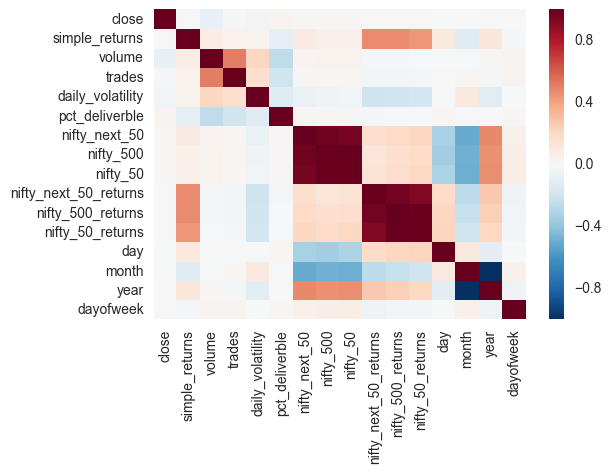

In [8]:
corr_data = data.corr()
sns.heatmap(corr_data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Y'], axis=1), data.Y, test_size=0.2)
from xgboost import XGBRegressor, XGBClassifier
classifier = XGBClassifier()
classifier.fit(X=X_train, y=y_train)
classifier.score(X=X_test, y=y_test)

In [ ]:
import xgboost

xgboost.plot_importance(classifier)

In [ ]:
X_test.head()
my_test = pd.DataFrame(index=['symbol'], columns=X_train.columns.copy())
my_test.loc['symbol'] = [942.15, 0.0076, 5684604, 147702, 0, 79.88, 23651.35, 7452.15, 8632.30, -0.0055, -0.0004, -0.00984, 30, 1, 2017, 1]
# my_test.loc['symbol'] = [929.40, -0.021, 12034267, 275395, 0, 67.14, 23279.30, 7379.30, 8561.30, -0.0157, -0.0098, -0.0083, 31, 1, 2017, 1]
my_test = my_test.astype(float)
classifier.predict(my_test)


In [ ]:
# my_test.loc['symbol'] = [942.15, 0.0076, 5684604, 147702, 0, 79.88, 23651.35, 7379.30, 8561.30, -0.0157, 0.0098, 0.0083, 31, 1, 2017, 1]
data = data.dropna()
print(len(data))
X = data.ix[:, 0:-1]
y = data.ix[:, -1].fillna(0)
y = pd.cut(y*100, bins=[-25, 0, 25], labels=[-1, 1]).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
clf.score(scale(X_train), (y_train)), clf.score(scale(X_test), (y_test))

In [ ]:
clf.predict(X_train).sum()

In [ ]:
y_train.sum()

In [ ]:
y.min()